In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter,ImageOps
from keras.preprocessing import image
import random
import cv2

imageList = os.listdir('../dataset/LSTMData')

Using TensorFlow backend.


(50, 32)


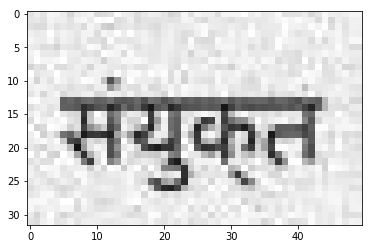

In [4]:
image2 = image.load_img("../dataset/LSTMData/"+imageList[1], color_mode="grayscale")
print(image2.size)
plt.imshow(image2, cmap='gray')

In [5]:
background = np.ones([32,180])*255
background.shape
background

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

In [10]:
img = np.array(image2)
(wt, ht) = (128, 32)
(h, w) = img.shape
fx = w / wt
fy = h / ht
f = max(fx, fy)
newSize = (max(min(wt, int(w / f)), 1), max(min(ht, int(h / f)), 1)) # scale according to f (result at least 1 and at most wt or ht)
img = cv2.resize(np.array(img), newSize)
target = np.ones([ht, wt]) * 255
target[0:newSize[1], 0:newSize[0]] = img

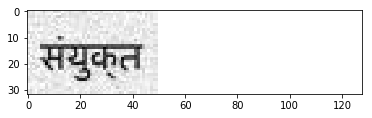

In [11]:
plt.imshow(target, cmap='gray')

Transpose

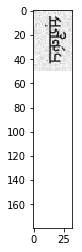

In [74]:
img = cv2.transpose(target)
plt.imshow(img, cmap='gray')

Normalize

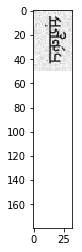

In [75]:
(m, s) = cv2.meanStdDev(img)
m = m[0][0]
s = s[0][0]
img = img - m
img = img / s if s>0 else img
plt.imshow(img, cmap='gray')

Loop through the image list to get truth text

In [76]:
a,b = imageList[0].split('_')
imageName = []
for image in imageList:
    name, extension = image.split('_')
    imageName.append(name)